**извлечение признаков из текста на естественном языке**

word2vec : skip-gram


Евгений Борисов <esborisov@sevsu.ru>

In [1]:
# import sys
import re
import gzip
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# # загружаем предварительно очищенный текст
# with gzip.open('../data/text.txt.gz','rt',encoding='utf-8') as f: text = f.read()

In [4]:
# загружаем текст
with gzip.open('../data/dostoevsky-besy-p2.txt.gz','rt',encoding='utf-8') as f: 
    text = [ s.strip() for s in re.split(r'[\n.?!]',f.read()) if s.strip() ]

In [5]:
len(text)

6200

In [6]:
# убираем заголовок
text = text[7:]

In [8]:
text[:10]

['Теперь, когда уже все прошло, и я пишу хронику, мы уже знаем в чем дело; но тогда мы еще ничего не знали, и естественно, что нам представлялись странными разные вещи',
 'По крайней мере мы со Степаном Трофимовичем в первое время заперлись и с испугом наблюдали издали',
 'Я-то кой-куда еще выходил и по-прежнему приносил ему разные вести, без чего он и пробыть не мог',
 'Нечего и говорить, что по городу пошли самые разнообразные слухи, то-есть насчет пощечины, обморока Лизаветы Николаевны и прочего случившегося в то воскресенье',
 'Но удивительно нам было то: через кого это все могло так скоро и точно выйти наружу',
 'Ни одно из присутствовавших тогда лиц не имело бы, кажется, ни нужды, ни выгоды нарушить секрет происшедшего',
 'Прислуги тогда не было; один Лебядкин мог бы что-нибудь разболтать, не столько по злобе, потому что вышел тогда в крайнем испуге (а страх к врагу уничтожает и злобу к нему), а единственно по невоздержности',
 'Но Лебядкин, вместе с сестрицей, на другой же день 

---

In [9]:
# применяет список замен pat к строке s
def replace_patterns(s,pat):
    if len(pat)<1: return s
    return  replace_patterns( re.sub(pat[0][0],pat[0][1],s), pat[1:] )

In [10]:
# нормализация текста
def string_normalizer(s):
    pat = [
       [r'ё','е',] # замена ё для унификации
       ,[r'[^а-я ]+',' '] # оставляем только буквы и пробел
       ,[r'^- *',' ']
       ,[r' +',' '] # удаляем повторы пробелов
    ]
    return replace_patterns(s.lower(),pat).strip()

In [11]:
text = list(map(string_normalizer,text))

In [12]:
text[:5]

['теперь когда уже все прошло и я пишу хронику мы уже знаем в чем дело но тогда мы еще ничего не знали и естественно что нам представлялись странными разные вещи',
 'по крайней мере мы со степаном трофимовичем в первое время заперлись и с испугом наблюдали издали',
 'я то кой куда еще выходил и по прежнему приносил ему разные вести без чего он и пробыть не мог',
 'нечего и говорить что по городу пошли самые разнообразные слухи то есть насчет пощечины обморока лизаветы николаевны и прочего случившегося в то воскресенье',
 'но удивительно нам было то через кого это все могло так скоро и точно выйти наружу']

In [13]:
# разрезаем текст на слова
text = [ [ w.strip() for w in s.split() if w.strip() ] for s in text ]

In [14]:
context_deep = 2 # глубина контекста

In [15]:
# удаляем короткие словосочетания
text = [ s for s in text if len(s) > context_deep*2 ]
len(text)

4568

In [16]:
text

[['теперь',
  'когда',
  'уже',
  'все',
  'прошло',
  'и',
  'я',
  'пишу',
  'хронику',
  'мы',
  'уже',
  'знаем',
  'в',
  'чем',
  'дело',
  'но',
  'тогда',
  'мы',
  'еще',
  'ничего',
  'не',
  'знали',
  'и',
  'естественно',
  'что',
  'нам',
  'представлялись',
  'странными',
  'разные',
  'вещи'],
 ['по',
  'крайней',
  'мере',
  'мы',
  'со',
  'степаном',
  'трофимовичем',
  'в',
  'первое',
  'время',
  'заперлись',
  'и',
  'с',
  'испугом',
  'наблюдали',
  'издали'],
 ['я',
  'то',
  'кой',
  'куда',
  'еще',
  'выходил',
  'и',
  'по',
  'прежнему',
  'приносил',
  'ему',
  'разные',
  'вести',
  'без',
  'чего',
  'он',
  'и',
  'пробыть',
  'не',
  'мог'],
 ['нечего',
  'и',
  'говорить',
  'что',
  'по',
  'городу',
  'пошли',
  'самые',
  'разнообразные',
  'слухи',
  'то',
  'есть',
  'насчет',
  'пощечины',
  'обморока',
  'лизаветы',
  'николаевны',
  'и',
  'прочего',
  'случившегося',
  'в',
  'то',
  'воскресенье'],
 ['но',
  'удивительно',
  'нам',
  'было

---

In [17]:
# ограничиваем количество примеров, чтобы поместиться в память
n_samples = 100

i_samples = np.random.permutation(len(text))[:n_samples]

text = [ text[i] for i in i_samples ]

---

In [18]:
# заменяем слова в тексте их номерами в словаре
words = sorted(set(sum(text,[]))) # словарь из текста
vocab =  { w:i for i,w in enumerate(words) }
code = [ [ vocab[w] for w in s ] for s in text ]

In [19]:
n_words = len(words) # количество слов в словаре
print( "размер словаря: %i слов" % n_words )

размер словаря: 888 слов


In [20]:
# [ контекст, слово, контекст]
def pack_history(s,cd=context_deep):
    return [ [ s[i-cd:i], s[i], s[i+1:i+cd+1] ] for i in range(cd,len(s)-cd) ] 

In [21]:
context = sum( [ pack_history(s,cd=context_deep) for s in code ], [] )

In [22]:
W = [ c[1] for c in context ] # коды слов
C = [ c[0]+c[2] for c in context ] # коды контекста слов

In [23]:
assert len(C) == len(W)

In [24]:
n_words,len(W)

(888, 1206)

---

In [25]:
len(W), len(C)

(1206, 1206)

---

In [26]:
# # унитарное кодирование слов (one-hot-encoding)
E = np.eye(n_words,dtype=np.int8)

Wbin = np.vstack([ E[c] for c in W ])
Wbin.shape

(1206, 888)

In [27]:
Cbin = np.vstack([ np.vstack([ E[c] for c in Ci ])[np.newaxis,:] for Ci in C ]) 
Cbin.shape

(1206, 4, 888)

---

In [28]:
# ф-ция активации скрытого слоя - линейная
# def act(s): return s

# ф-ция активации выходного слоя
def softmax(s): 
    e = np.exp(s)
    return e/e.sum(axis=1).reshape(s.shape[0],1)

In [29]:
def w2v_step(W,Vi,Vo):
    H = W.dot(Vi) # значения скрытого слоя
    U = H.dot(Vo) # состояния выходного слоя
    O = softmax(U) # выход сети
    return H,U,O


Функция потери

$$E = \left| \sum\limits_i\log\left( \sum\limits_k \exp(U_{ik}) \right) - \sum\limits_i\sum\limits_k\sum\limits_j (U_{ik} * Q_{ijk}) \right| $$


$U_{ik}$ состояние k-того нейрона выходного слоя для слова $i$     
$Q_{ij}$ слово $j$ контекста слова $i$   
где ∗ - операция поэлементного умножения векторов

In [30]:
def w2v_loss(U,C):
    n,cws,v = C.shape 
    # количество примеров
    # размер окна контекста   
    # количество слов в словаре

    Us = np.log( np.exp(U).sum(axis=1) ).sum()

    Uo = 0.0
    for i in range(cws): # для всех слов контекста
        Ci = C[:,i,:].reshape([n,v]) # набор слов контекста i
        Uo += (U*Ci).sum() # значения выходного слоя для слов x контекста i

    return np.abs(Us-Uo)/n

In [31]:
def w2v_grad(C,W,H,O,Vo):
    n,cws,v = C.shape
        # количество примеров
        # размер окна контекста   
        # количество слов в словаре

    gVi = gVo = 0.0 

    for i in range(cws):
        Ci = C[:,i,:].reshape([n,v]) # слово i контекста
        D = O - Ci # ошибка на слове контекста i
        gVo += D.T.dot(H).T
        gVi += W.T.dot(D).dot(Vo.T)

    return gVi,gVo

---

In [32]:
def w2v_weigth_norm(v,w):
    nn = np.linalg.norm( np.hstack([ v.flatten(), w.flatten() ]) )
    #nn = np.abs( np.hstack([ v.flatten(), w.flatten() ]) ).max()
    return (v/nn,w/nn) if nn!=0.0 else (v,w)

---

In [33]:
n = Wbin.shape[1] # количество слов в словаре
k = 30 # размер скрытого слоя H

Vi = np.random.normal(scale=0.01,size=(n,k))
Vo = np.random.normal(scale=0.01,size=(k,n))

In [34]:
%%time

a = 0.91 # скорость обучения

er = [1e10]

n_steps = 100

for i in range(n_steps):
    H,U,O = w2v_step(Wbin,Vi,Vo) # вычисляем состояния слоёв и выход
    er.append(w2v_loss(U,Cbin)) # вычисляем ошибку
    print(i+1, er[-1])
    if er[-1]>er[-2]: 
        Vi, Vo = Vi_old, Vo_old
        break
        
    gVi, gVo = w2v_grad(Cbin,Wbin,H,O,Vo) # вычисляем градиент ф-ции потери
    gVi,gVo = w2v_weigth_norm(gVi,gVo) # нормируем значения градиента
    
    Vi_old, Vo_old =  Vi, Vo # сохраняем старые веса
    
    Vi,Vo = Vi-a*gVi, Vo-a*gVo # корректируем веса

1 6.788920307125739
2 6.784859312699736
3 6.772825102998057
4 6.7454604608672595
5 6.701044930969555
6 6.638836573249259
7 6.558710866104831
8 6.461108807505233
9 6.347616294735629
10 6.222742628008313
11 6.09743652911778
12 5.969723199020864
13 5.840093994072739
14 5.708428652863138
15 5.5756047790668655
16 5.441106760468084
17 5.304603749716248
18 5.166132455525048
19 5.025834268787604
20 4.88372451627716
21 4.73992354881933
22 4.5945840298679075
23 4.44790611364901
24 4.300041633610968
25 4.151182448631903
26 4.001612147917032
27 3.851747318947402
28 3.7021062799434676
29 3.553293592304948
30 3.405913446752695
31 3.260445421195024
32 3.117070064031566
33 2.9756730268710054
34 2.8359067813579175
35 2.697490769101774
36 2.5600271484431287
37 2.4236961662270975
38 2.28747129117037
39 2.153868307406967
40 2.015227053152591
41 1.8957991280131257
42 1.73334016160296
43 1.7503050199738197
CPU times: user 11.9 s, sys: 3.41 s, total: 15.3 s
Wall time: 4.1 s


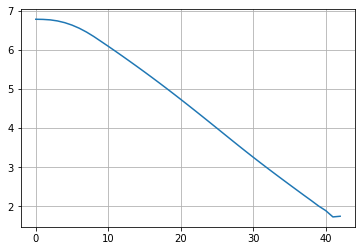

In [35]:
er=er[1:]
plt.plot(er)
plt.grid()
plt.show()

---

In [36]:
from sklearn.metrics.pairwise import pairwise_distances

In [37]:
D = pairwise_distances(Vi) # матрица расстояний
R = np.argsort(D) # номера слов в порядке увеличения расстояния

In [39]:
vocab = { i:w for i,w in enumerate(words) } # нумеруем слов в словаре

nn = np.random.permutation(len(words))[:20] # выбираем случайно N слов

# для выбранных слов печатаем близкие по w2v
{ vocab[i] : [ vocab[j] for j in  R[i,1:5]  ] for i in nn }

{'необходимо': ['отвергать', 'позволит', 'молодых', 'говорить'],
 'нарушить': ['темень', 'отселе', 'какова', 'можете'],
 'смуту': ['торопился', 'ужасно', 'рыжий', 'накопленные'],
 'представь': ['николаевну', 'выслушать', 'сени', 'люблю'],
 'объявил': ['остервенился', 'заметил', 'согласен', 'под'],
 'него': ['дослужился', 'хотя', 'поглядела', 'пристально'],
 'рада': ['должности', 'глазами', 'этот', 'поддакивать'],
 'века': ['отжившего', 'добрый', 'отстали', 'довольно'],
 'отводила': ['материальных', 'находит', 'причин', 'пор'],
 'каких': ['быстром', 'куда', 'брыкове', 'темны'],
 'уехал': ['неотразимо', 'разрешении', 'неясная', 'всеми'],
 'левый': ['швейцар', 'случится', 'николаевну', 'отлично'],
 'первоначальное': ['таким', 'летами', 'скверными', 'запутался'],
 'разгонит': ['пред', 'выдумал', 'молодых', 'говорить'],
 'николаевну': ['странные', 'скороговоркой', 'меж', 'вынести'],
 'городе': ['прежнее', 'пору', 'роде', 'народе'],
 'накопленные': ['рублей', 'рыжий', 'высокий', 'бурбон'],
 